In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/position-salary-dataset/Position_Salaries.csv


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing dataset**

In [3]:
df = pd.read_csv('/kaggle/input/position-salary-dataset/Position_Salaries.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:,[1]].values
y = df.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


**Ploting the independent and dependent variable to get an idea of which model to use**

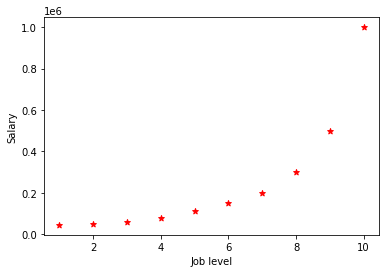

In [5]:
plt.scatter(X, y, color='red', marker='*')
plt.xlabel('Job level')
plt.ylabel('Salary')
plt.show()

From plot we see that datapoints are not linear. So, Simple Linear Regreesion will not be the best choice for this data

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [7]:
lin_reg.predict([[6.5]])

array([330378.78787879])

This data point will fit best in case of polynomial regression. For Polynomial Regression our eqn: y = b0 + b1.x + b2.x + b3.x +..........+ bn.x

So, first we will transfrom our matrix of feature 

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=4)
X_poly = poly_f.fit_transform(X)
X_poly


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

**Creating new regressor to fit our new matrix of feature**

In [9]:
regressor = LinearRegression()
regressor.fit(poly_f.fit_transform(X), y)

LinearRegression()

In [10]:
regressor.predict(poly_f.fit_transform([[6.5]]))

array([158862.45265153])

In [11]:
print("Score of Simple Linear Regression Model {}".format(lin_reg.score(X,y)))
print("Score of Polynomial Regression Model {}".format(regressor.score(poly_f.fit_transform(X),y)))

Score of Simple Linear Regression Model 0.6690412331929895
Score of Polynomial Regression Model 0.9973922891706613


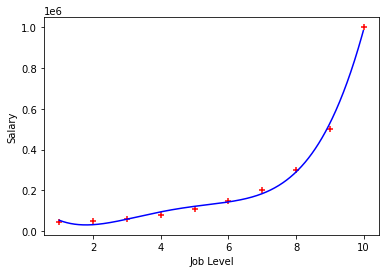

In [12]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1,1)
plt.scatter(X, y, color='red', marker='+')
plt.plot(X_grid, regressor.predict(poly_f.fit_transform(X_grid)), color='blue')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()